In [20]:
import h5py
file = h5py.File('../data/Proca_fiducial_scaled_cropped.hdf5', 'r')

In [21]:
file.keys()

<KeysViewHDF5 ['Train']>

In [22]:
file['Train'].keys()

<KeysViewHDF5 ['input', 'target']>

In [23]:
a = file['Train']['input']

In [24]:
a.shape

(407, 2, 72, 72, 72)

In [14]:
import numpy as np

x = np.array([[1, 2], [3, 4], [5, 6]])
a_even = a[::2, 0, :, :, 0]
np.repeat(a_even, [2], axis = 0).shape

(408, 72, 72)

In [25]:
b = file['Train']['target']

In [26]:
b.shape

(407, 1, 72, 72, 72)

In [16]:
x = np.array([[1, 2], [3, 4]])
y = np.array([[5, 6], [7, 8]])
np.concatenate((x, y), axis = 1)

array([[1, 2, 5, 6],
       [3, 4, 7, 8]])

In [33]:
import numpy as np
import cv2
import os


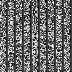

In [8]:
from PIL import Image
# %matplotlib inline


b = np.array(a)
c = b[0, 0, 0, :, :]

img = Image.fromarray(c, 'L')
img

In [9]:
b = np.array(a)
c = b[0, 1, 0, :, :]

img = Image.fromarray(c, 'L').convert('RGB')
img.show()

In [10]:
b_marginal = b[:, 0, :, :, 0]
b_norm = np.uint8(255 * (b_marginal - b_marginal.min()) / (b_marginal.max() - b_marginal.min()))

In [17]:
b_norm.shape

(407, 72, 72)

In [14]:
all_array = []

for i in range(407):
#     all_array.append(np.array(Image.fromarray(b[i, 0, 0], 'L').convert('RGB')))
    all_array.append(np.array(Image.fromarray(b_norm[i], 'L').convert('RGB')))

In [15]:
out = cv2.VideoWriter(
    '/Users/nikhilvs/repos/nyu/numerical-relativity-interpolation/notebooks/test_new.avi', 
    cv2.VideoWriter_fourcc(*'DIVX'), 
    10, 
    (72, 72)
)

for i in range(len(all_array)):
    out.write(all_array[i])
out.release()

In [13]:
all_array[0].shape

(72, 72, 3)

In [59]:
out.get(2209889)

0.0

In [40]:
def generate_video_from_tensor(frame_tensor, save_path):
    # shape of frame_tensor is (num_frames, spatial_x, spatial_y, spatial_z)

    num_frames = frame_tensor.shape[0]

    b_marginal = np.array(frame_tensor[:, :, :, 0])
    b_norm = np.uint8(255 * (b_marginal - b_marginal.min()) / (b_marginal.max() - b_marginal.min()))

    all_array = []

    for i in range(num_frames):
        all_array.append(np.array(Image.fromarray(b_norm[i], 'L').convert('RGB')))

    out = cv2.VideoWriter(
        # '/Users/nikhilvs/repos/nyu/numerical-relativity-interpolation/notebooks/test_new.avi', 
        save_path,
        cv2.VideoWriter_fourcc(*'XVID'), 
        10, 
        (72, 72)
    )

    for i in range(len(all_array)):
        out.write(all_array[i])
    out.release()

    return

In [41]:
video_path = '/Users/nikhilvs/repos/nyu/numerical-relativity-interpolation/notebooks/test_new_2.mp4'

generate_video_from_tensor(
    a[:, 0, :, :, :],
    video_path
)

In [44]:
from IPython.display import Video

Video(
    video_path, 
    embed = True,
    width = 500,
    height = 500
)

In [62]:
import numpy as np
import cv2
import os
from PIL import Image

def transform_tensor_to_video_frames(frame_tensor):
    # shape of frame_tensor is (num_frames, spatial_x, spatial_y)

    num_frames = frame_tensor.shape[0]

    b_marginal = np.array(frame_tensor)
    b_norm = np.uint8(255 * (b_marginal - b_marginal.min()) / (b_marginal.max() - b_marginal.min()))

    all_array = []

    for i in range(num_frames):
        all_array.append(np.array(Image.fromarray(b_norm[i], 'L').convert('RGB')))

    return all_array



def save_video(frame_list, save_path, video_shape):
    out = cv2.VideoWriter(
        save_path,
        cv2.VideoWriter_fourcc(*'XVID'), 
        10, 
        video_shape
    )

    for i in range(len(frame_list)):
        out.write(frame_list[i])
    out.release()

    return



def generate_video_from_tensor(frame_tensor, save_path):
    # shape of frame_tensor is (num_frames, spatial_x, spatial_y)

    all_array = transform_tensor_to_video_frames(frame_tensor)
    save_video(all_array, save_path, (72, 72))

    return

'''
video_path = '/Users/nikhilvs/repos/nyu/numerical-relativity-interpolation/notebooks/test_new_2.mp4'

generate_video_from_tensor(
    a[:, 0, :, :, :],
    video_path
)


from IPython.display import Video

Video(
    video_path, 
    embed = True,
    width = 500,
    height = 500
)
'''


def generate_input_target_predicted_video(input_tensor, target, predicted, save_path):
    # input shape is (num_frames, 2, spatial_x, spatial_y)
    # target shape is (num_frames, 1, spatial_x, spatial_y)

    # stutter video is even frames from input shape
    # target video is all frames from target
    # predicted video is all frames from predicted

    input_even = input_tensor[::2, 0, :, :, 0]
    input_repeated = np.repeat(input_even, [2], axis = 0)

    input_video_frames = transform_tensor_to_video_frames(input_repeated)
    target_video_frames = transform_tensor_to_video_frames(target[:, 0, :, :])
    predicted_video_frames = transform_tensor_to_video_frames(predicted[:, 0, :, :])

    all_video_frames = []

    for i in range(len(input_video_np.shape)):
        input_frame = input_video_frames[i]
        target_frame = target_video_frames[i]
        predicted_frame = predicted_video_frames[i]

        video_frame = np.concatenate((input_frame, target_frame, predicted_frame), axis = 1)
        all_video_frames.append(video_frame)
    
    save_video(all_video_frames, save_path, (72, 72 * 3))

    return


def generate_input_target_video(input_tensor, target, save_path):
    # input shape is (num_frames, 2, spatial_x, spatial_y)
    # target shape is (num_frames, 1, spatial_x, spatial_y)

    # stutter video is even frames from input shape
    # target video is all frames from target
    # predicted video is all frames from predicted

    input_even = input_tensor[::2, 0, :, :, 0]
    input_repeated = np.repeat(input_even, [2], axis = 0)

    input_video_frames = transform_tensor_to_video_frames(input_repeated)
    target_video_frames = transform_tensor_to_video_frames(target[:, 0, :, :, 0])

    all_video_frames = []
    
    num_frames = min(len(input_video_frames), len(target_video_frames))

    for i in range(num_frames):
        input_frame = input_video_frames[i]
        target_frame = target_video_frames[i]

        video_frame = np.concatenate((input_frame, target_frame), axis = 1)
        all_video_frames.append(video_frame)
    
    save_video(all_video_frames, save_path, (72, 72 * 2))

    return


def generate_input_target_video_1(input_tensor, target, save_path):
    # input shape is (num_frames, 2, spatial_x, spatial_y)
    # target shape is (num_frames, 1, spatial_x, spatial_y)

    # stutter video is even frames from input shape
    # target video is all frames from target
    # predicted video is all frames from predicted
    
    input_tensor = np.array(input_tensor)
    target = np.array(target[:, 0, :, :, 0])

    input_even = input_tensor[::2, 0, :, :, 0]
    input_repeated = np.repeat(input_even, [2], axis = 0)

    
    num_frames = min(input_repeated.shape[0], target.shape[0])

    print(
        (input_repeated[:num_frames, :, :].shape, target[:num_frames, :, :].shape)
    )
    
    video_np = np.concatenate(
        (input_repeated[:num_frames, :, :], target[:num_frames, :, :]), 
        axis = 1
    )
    
    all_video_frames = transform_tensor_to_video_frames(video_np)
    save_video(all_video_frames, save_path, (72, 72*2))

    return

In [63]:
generate_input_target_video_1(
    a, 
    b,
    '/Users/nikhilvs/repos/nyu/numerical-relativity-interpolation/notebooks/test_new_3.mp4'
)

((407, 72, 72), (407, 72, 72))


In [46]:
np.concatenate((np.array(a[:, 0, :, :, 0]), np.array(b[:, 0, :, :, 0])), axis = 1).shape

(407, 144, 72)